In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
warnings.filterwarnings("ignore")

In [2]:
# Reading the Data
df = pd.read_csv(r"C:\Users\tiles\Downloads\youth_data.csv")

In [3]:
# Checking the first 5 Rows
df.head(5)

,iralcfy,irmjfy,ircigfm,IRSMKLSS30N,iralcfm,irmjfm,ircigage,irsmklsstry,iralcage,irmjage,...,eduschlgo,EDUSCHGRD2,eduskpcom,imother,ifather,income,govtprog,POVERTY3,PDEN10,COUTYP4
0,993,991,91,91,93.0,91.0,991,991,12,991,...,1,5,0,1,1,4,2,3,2,2
1,991,991,91,91,91.0,91.0,991,991,991,991,...,1,5,0,1,1,4,2,3,1,1
2,993,993,93,91,93.0,93.0,13,991,13,13,...,1,4,0,1,1,4,1,3,1,1
3,991,991,91,91,91.0,91.0,991,991,991,991,...,1,7,0,1,1,2,2,1,2,2
4,991,991,91,91,91.0,91.0,991,991,991,991,...,1,3,0,1,1,4,2,3,2,2


In [4]:
# Checking Column Names:
df.columns

Index(['iralcfy', 'irmjfy', 'ircigfm', 'IRSMKLSS30N', 'iralcfm', 'irmjfm',
       'ircigage', 'irsmklsstry', 'iralcage', 'irmjage', 'mrjflag', 'alcflag',
       'tobflag', 'alcydays', 'mrjydays', 'alcmdays', 'mrjmdays', 'cigmdays',
       'smklsmdays', 'schfelt', 'tchgjob', 'avggrade', 'stndscig', 'stndsmj',
       'stndalc', 'stnddnk', 'parchkhw', 'parhlphw', 'PRCHORE2', 'PRLMTTV2',
       'parlmtsn', 'PRGDJOB2', 'PRPROUD2', 'argupar', 'YOFIGHT2', 'YOGRPFT2',
       'YOHGUN2', 'YOSELL2', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2',
       'prmjmo', 'PRALDLY2', 'YFLPKCG2', 'YFLTMRJ2', 'yflmjmo', 'YFLADLY2',
       'FRDPCIG2', 'FRDMEVR2', 'frdmjmon', 'FRDADLY2', 'talkprob', 'PRTALK3',
       'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2',
       'DRPRVME3', 'ANYEDUC3', 'rlgattd', 'rlgimpt', 'rlgdcsn', 'rlgfrnd',
       'irsex', 'NEWRACE2', 'HEALTH2', 'eduschlgo', 'EDUSCHGRD2', 'eduskpcom',
       'imother', 'ifather', 'income', 'govtprog', 'POVERTY3', 'PDEN10',

##### We can observe that the columns are not in same format, so lets make all the column names in lowercase, so that it would be easy to understand

In [5]:
df.columns = df.columns.str.lower()

##### Since I am working for Alcohol abuse, i will remove the columns related to Tobacco, Marijuana and Cigrattes. So that it becomes a little more clear to work on the rest of the dataset. 


In [6]:
col = ['irmjfy', 'ircigfm', 'irsmklss30n', 'irmjfm', 'ircigage', 'irsmklsstry','irmjage', 'mrjflag', 'tobflag', 'mrjydays', 'mrjmdays', 
       'cigmdays', 'smklsmdays','stndscig','stndsmj','prpkcig2','prmjevr2','prmjmo', 'yflpkcg2','yfltmrj2','yflmjmo', 'frdpcig2','frdmevr2',
      'frdmjmon']
df = df.drop(columns=col)
df.columns

Index(['iralcfy', 'iralcfm', 'iralcage', 'alcflag', 'alcydays', 'alcmdays',
       'schfelt', 'tchgjob', 'avggrade', 'stndalc', 'stnddnk', 'parchkhw',
       'parhlphw', 'prchore2', 'prlmttv2', 'parlmtsn', 'prgdjob2', 'prproud2',
       'argupar', 'yofight2', 'yogrpft2', 'yohgun2', 'yosell2', 'yostole2',
       'yoattak2', 'praldly2', 'yfladly2', 'frdadly2', 'talkprob', 'prtalk3',
       'prbsolv2', 'previol2', 'prvdrgo2', 'grpcnsl2', 'pregpgm2', 'ythact2',
       'drprvme3', 'anyeduc3', 'rlgattd', 'rlgimpt', 'rlgdcsn', 'rlgfrnd',
       'irsex', 'newrace2', 'health2', 'eduschlgo', 'eduschgrd2', 'eduskpcom',
       'imother', 'ifather', 'income', 'govtprog', 'poverty3', 'pden10',
       'coutyp4'],
      dtype='object')

### EDA

In [7]:
# Shape of the dataset
df.shape

(5500, 55)

In [8]:
# Checking for NA values
NA_values = df.isna().sum()
NA_columns = NA_values[NA_values > 0]
NA_columns

tchgjob      16
avggrade    353
stndalc     242
stnddnk     298
parchkhw     19
parhlphw     38
prchore2     18
prlmttv2     42
parlmtsn    132
prgdjob2     22
prproud2     21
argupar      87
yofight2     23
yogrpft2     29
yohgun2      23
yosell2      15
yostole2     13
yoattak2     13
praldly2     55
yfladly2     52
frdadly2     80
talkprob    146
prtalk3      90
prbsolv2    166
previol2     79
prvdrgo2     67
grpcnsl2     66
pregpgm2     51
ythact2      26
drprvme3     89
anyeduc3     78
rlgattd     135
rlgimpt     120
rlgdcsn     131
rlgfrnd     153
health2       1
dtype: int64

In [9]:
# We can observe that we have many columns which has missing or NA values in their dataset, so we will remove these NA values
df = df.dropna()

In [10]:
NA_values = df.isna().sum()
NA_columns = NA_values[NA_values > 0]
NA_columns

Series([], dtype: int64)

In [11]:
# Now we can observe that there are no more NA values in our dataset and now lets check the shape of the data.
df.shape

(4347, 55)

##### Lets rename all the columns so that it would be easy to understand the dataset.

In [12]:
col_names = {
    'iralcfy': 'Alc_Frq_Year',
    'iralcfm': 'Alc_Frq_Month',
    'iralcage': 'Alc_use_Age',
    'alcflag': 'Alc_Use',
    'alcydays': 'Alc_Last_Year',
    'alcmdays': 'Alc_Last_Month',
    'schfelt': 'Exp_of_School',
    'tchgjob': 'Teacher_Feedback',
    'avggrade': 'Last_Avg_Grade',
    'stndalc': 'Used_Alc',
    'stnddnk': 'Used_Alc_Week',
    'parchkhw': 'Parents_CheckHW_LastYear',
    'parhlphw': 'Parents_HelpHW_LastYear',
    'prchore2': 'Youth_doing_HChores',
    'prlmttv2': 'Parents_Limit_TV',
    'parlmtsn': 'Parents_Limit_Snacks',
    'prgdjob2': 'Parents_Appreciation',
    'prproud2': 'Proud_Parents',
    'argupar': 'Argument_Parents',
    'yofight2': 'Youth_Fight',
    'yogrpft2': 'Youth_Group_Fight',
    'yohgun2': 'Youth_have_Gun',
    'yosell2': 'Youth_Sell_Drugs',
    'yostole2': 'Youth_Steals',
    'yoattak2': 'Youth_Attacked',
    'praldly2': 'Parent Alcohol Daily',
    'yfladly2': 'Peer_Drinking_Feel',
    'frdadly2': 'Friend_Feedback_Alc',
    'talkprob': 'Share_Problems',
    'prtalk3': 'Talked_with_Parents',
    'prbsolv2': 'Part_Extracurricular',
    'previol2': 'Part_Violence_Prevention',
    'prvdrgo2': 'Part_Substance_Prevention',
    'grpcnsl2': 'Part_Help_Substance_Use',
    'pregpgm2': 'Part_Preg/STD_Prevention',
    'ythact2': 'Part_Youth_Act',
    'drprvme3': 'Yth_seen_alc+drug_prevention_ad',
    'anyeduc3': 'Education_On_alc+drug',
    'rlgattd': 'Number_Religion_Attend',
    'rlgimpt': 'Yth_Believe_Religion Imp',
    'rlgdcsn': 'Religion_Influence',
    'rlgfrnd': 'Religius_Friend',
    'irsex': 'Gender',
    'newrace2': 'Race',
    'health2': 'Health_Condition',
    'eduschlgo': 'Attending_School',
    'eduschgrd2': 'Educlation_Level',
    'eduskpcom': 'School_Skipped',
    'imother': 'Individual_Mother',
    'ifather': 'Individual_Father',
    'income': 'Income',
    'govtprog': 'Part_Gov_Program',
    'poverty3': 'Poverty_Level',
    'pden10': 'Population Density',
    'coutyp4': 'Metro_Size'
}
df = df.rename(columns=col_names)


In [13]:
df.columns

Index(['Alc_Frq_Year', 'Alc_Frq_Month', 'Alc_use_Age', 'Alc_Use',
       'Alc_Last_Year', 'Alc_Last_Month', 'Exp_of_School', 'Teacher_Feedback',
       'Last_Avg_Grade', 'Used_Alc', 'Used_Alc_Week',
       'Parents_CheckHW_LastYear', 'Parents_HelpHW_LastYear',
       'Youth_doing_HChores', 'Parents_Limit_TV', 'Parents_Limit_Snacks',
       'Parents_Appreciation', 'Proud_Parents', 'Argument_Parents',
       'Youth_Fight', 'Youth_Group_Fight', 'Youth_have_Gun',
       'Youth_Sell_Drugs', 'Youth_Steals', 'Youth_Attacked',
       'Parent Alcohol Daily', 'Peer_Drinking_Feel', 'Friend_Feedback_Alc',
       'Share_Problems', 'Talked_with_Parents', 'Part_Extracurricular',
       'Part_Violence_Prevention', 'Part_Substance_Prevention',
       'Part_Help_Substance_Use', 'Part_Preg/STD_Prevention', 'Part_Youth_Act',
       'Yth_seen_alc+drug_prevention_ad', 'Education_On_alc+drug',
       'Number_Religion_Attend', 'Yth_Believe_Religion Imp',
       'Religion_Influence', 'Religius_Friend', 'Gender

In [14]:
# Now lets check the different values in the variables
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Alc_Frq_Year
Alc_Frq_Year
991    3171
993     217
1       144
2       112
3        92
       ... 
61        1
45        1
37        1
47        1
82        1
Name: count, Length: 80, dtype: int64


Column: Alc_Frq_Month
Alc_Frq_Month
91.0    3171
93.0     756
1.0      160
2.0      105
3.0       52
4.0       28
5.0       16
6.0       13
10.0       9
7.0        9
13.0       5
9.0        5
1.5        3
15.0       3
14.0       3
8.0        3
23.0       2
18.0       1
12.0       1
20.0       1
11.0       1
Name: count, dtype: int64


Column: Alc_use_Age
Alc_use_Age
991    3171
15      297
14      258
13      192
16      152
12       88
17       49
11       47
10       31
9        16
8        15
7        12
6         8
5         4
4         3
3         2
2         1
1         1
Name: count, dtype: int64


Column: Alc_Use
Alc_Use
0    3171
1    1176
Name: count, dtype: int64


Column: Alc_Last_Year
Alc_Last_Year
6    3388
1     579
2     239
3      84
4      56
5       1
Name: count, 

##### Now we will redo the allignments in some of the columns where we are getting some values as 991,993,85,94,97,98,99 and other odd values.

##### First Columns: Alc_Frq_Year
##### In this column we can observe that there are multiple values and we can make those more in line with other varaiables. The data we have is of 1 year in which it contains the range of days from 1 to 365. Also 991 means NEVER USED ALCOHOL and 993 means DID NOT USE ALCOHOL PAST YEAR, so we can convert this into 0. While the data may scale to any dates we can divide this month wise like1 to 30 as 1, 30 to 60 as 2 and 60 to 90 as 3 and 90+ days as 4.

In [15]:
def reassign_1(value):
    if value in [991, 993]:
        return 0
    elif value <= 30:
        return 1
    elif value <= 60:
        return 2
    elif value <= 90:
        return 3
    else:
        return 4

df['Alc_Frq_Year'] = df['Alc_Frq_Year'].apply(reassign_1)
print(df['Alc_Frq_Year'].value_counts())


Alc_Frq_Year
0    3388
1     752
2     120
4      65
3      22
Name: count, dtype: int64


##### Second Columns: Alc_Frq_Month
##### In this column the data provided is of alcohol frequncy last month. In we have 91 and 93 as never used and did not use last month which i am going assign as 0 as its have not been used for last month or ever. Lastly I will divide the dates into as per weeks like 1 to 7 is 1, 8 to 14 as 2, 15 to 21 as 3 and 22 and above as 4.  

In [16]:
def reassign_2(value):
    if value in [91, 93]:
        return 0
    elif value <= 7:
        return 1
    elif value <= 14:
        return 2
    elif value <= 21:
        return 3
    else:
        return 4
        
df['Alc_Frq_Month'] = df['Alc_Frq_Month'].apply(reassign_2)

print(df['Alc_Frq_Month'].value_counts())

Alc_Frq_Month
0    3927
1     386
2      27
3       5
4       2
Name: count, dtype: int64


##### Third Columns: Alc_use_Age
##### In this column the data provided is of alcohol used at which age. Here we have some intersting data, we have seen some values also assigned where the age is even 1. We have never used as 991 in our data. Since the numbers on age between 1 to 5 is less and also it does not make much impact or even sence to have these numbers, so we will convert the age less than 6 and 991 as 0, 6 to 12 as 1 and 12 + as 2.

In [17]:
def reassign_3(value):
    if value <= 6 or value == 991:
        return 0
    elif value <= 12:
        return 1
    else:
        return 2

df['Alc_use_Age'] = df['Alc_use_Age'].apply(reassign_3)
print(df['Alc_use_Age'].value_counts())

Alc_use_Age
0    3190
2     948
1     209
Name: count, dtype: int64


##### Forth Columns: Attending_School
##### In this column the data provided is of the youth is attending the school or not. The data has some values like 85, 97,98 and 99 which tells that either its bad data or refued or blank or left blank and its numbers are much less so we will assign these under No as 2. 11 provides details where the youth is going to school but is not regular and missing the school. So we can assign that 11 to 1. 

In [18]:
def reassign_4(value):
    if value in [85, 94, 97, 98]:
        return 2
    elif value == 11:
        return 1
    else:
        return value

df['Attending_School'] = df['Attending_School'].apply(reassign_4)
print(df['Attending_School'].value_counts())

Attending_School
1    3772
2     575
Name: count, dtype: int64


##### Fifth Columns: Educlation_Level
##### In this column the data provided is of the level of Education a youth is studying currently. We have differnt valaues ranging from less than 5, 6th, 7th, 8th and till college. We also have 98 and 99 which tells either its blank or left on purpose. So in this part we will reassign values where 98 and 99 will be counted as 0, less 5th Grade will assigned as 1 as its already have been. We will assign value 2 for classes 6th to 10th, 11th and 12th as 3 and for College as 4.  

In [19]:
def reassign_5(value):
    if value in [99, 98]:
        return 0
    elif value < 5:
        return 1
    elif value < 7:
        return 2
    elif value < 9:
        return 3
    else:
        return 4

df['Educlation_Level'] = df['Educlation_Level'].apply(reassign_5)
print(df['Educlation_Level'].value_counts())


Educlation_Level
1    1420
2    1363
3     973
0     583
4       8
Name: count, dtype: int64


##### Sixth Columns: School_Skipped
##### In this column the data provided speaks about the number of days youth has skipped school and there are some values like 94, 97,98,99 which is alternative of either blank, skip, dont't know or refusd to say anything. These will be assignment a value of 5. While we will divide this data into 1 to 7 as 1, 8 to 14 as 2, 15 to 21 as 3 and 22 to 30 as 4.

In [20]:
def reassign_6(value):
    if value in [94, 97, 98, 99]:
        return 5
    elif value == 0:
        return 0
    elif value <= 7:
        return 1
    elif value <= 14:
        return 2
    elif value <= 21:
        return 3
    elif value <= 30:
        return 4
    else:
        return None  

df['School_Skipped'] = df['School_Skipped'].apply(reassign_6)
print(df['School_Skipped'].value_counts())

School_Skipped
0    2870
5     854
1     563
2      36
3      17
4       7
Name: count, dtype: int64


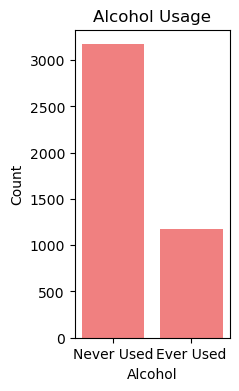

In [21]:
# Lets do some feature checks with Graphs
plt.figure(figsize=(2, 4))
plt.bar(['Never Used', 'Ever Used'], df['Alc_Use'].map({0: 'Never Used', 1: 'Ever Used'}).value_counts(), color='lightcoral')
plt.title('Alcohol Usage')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()

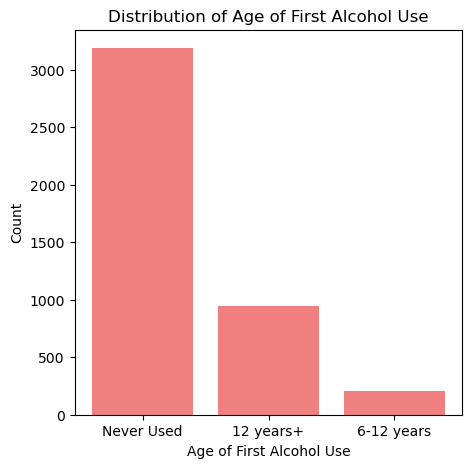

In [85]:
age_labels = {0: 'Never Used', 1: '6-12 years', 2: '12 years+'}
plt.figure(figsize=(5, 5))
plt.bar(df['Alc_use_Age'].map(age_labels).value_counts().index, df['Alc_use_Age'].value_counts(), color='lightcoral')
plt.title('Distribution of Age of First Alcohol Use')
plt.xlabel('Age of First Alcohol Use')
plt.ylabel('Count')
plt.show()

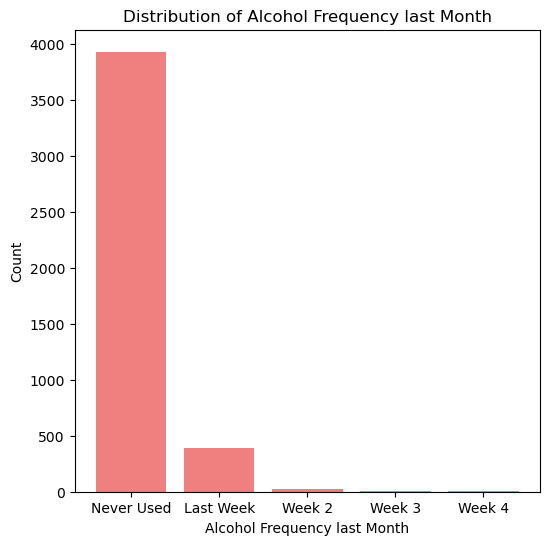

In [94]:
frequency = {0: 'Never Used', 1: 'Last Week', 2: 'Week 2', 3: 'Week 3', 4: 'Week 4'}
plt.figure(figsize=(6, 6))
plt.bar(df['Alc_Frq_Month'].map(frequency).value_counts().index, df['Alc_Frq_Month'].value_counts(), color='lightcoral')
plt.title('Distribution of Alcohol Frequency last Month')
plt.xlabel('Alcohol Frequency last Month')
plt.ylabel('Count')
plt.show()


### Model Building

##### Now its all the columns are perfectly alligned and we can now proceed to do Binary Classification. For this we are considering the target varaiable as Alc_Use. Some of the substance columns are not required for our Binary classification we will create a new dataset for this porpose. 

In [24]:
col_not_required = ['Alc_Frq_Year', 'Alc_Frq_Month', 'Alc_Last_Year', 'Alc_use_Age', 'Alc_Last_Month']
binary_df = df.drop(columns=col_not_required)
print(binary_df.head())

   Alc_Use  Exp_of_School  Teacher_Feedback  Last_Avg_Grade  Used_Alc  \
0        1              1               1.0             2.0       2.0   
1        0              1               1.0             2.0       2.0   
2        1              1               1.0             2.0       2.0   
3        0              1               1.0             2.0       2.0   
5        0              1               1.0             2.0       2.0   

   Used_Alc_Week  Parents_CheckHW_LastYear  Parents_HelpHW_LastYear  \
0            2.0                       1.0                      1.0   
1            2.0                       1.0                      2.0   
2            2.0                       1.0                      1.0   
3            2.0                       1.0                      1.0   
5            2.0                       1.0                      2.0   

   Youth_doing_HChores  Parents_Limit_TV  ...  Attending_School  \
0                  2.0               2.0  ...                 1   


##### Let's start our first model Decision Tree Classifier.

In [25]:
X = binary_df.drop('Alc_Use', axis=1)
y = binary_df['Alc_Use']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7019157088122605
Confusion Matrix:
[[736 205]
 [184 180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       941
           1       0.47      0.49      0.48       364

    accuracy                           0.70      1305
   macro avg       0.63      0.64      0.64      1305
weighted avg       0.71      0.70      0.70      1305



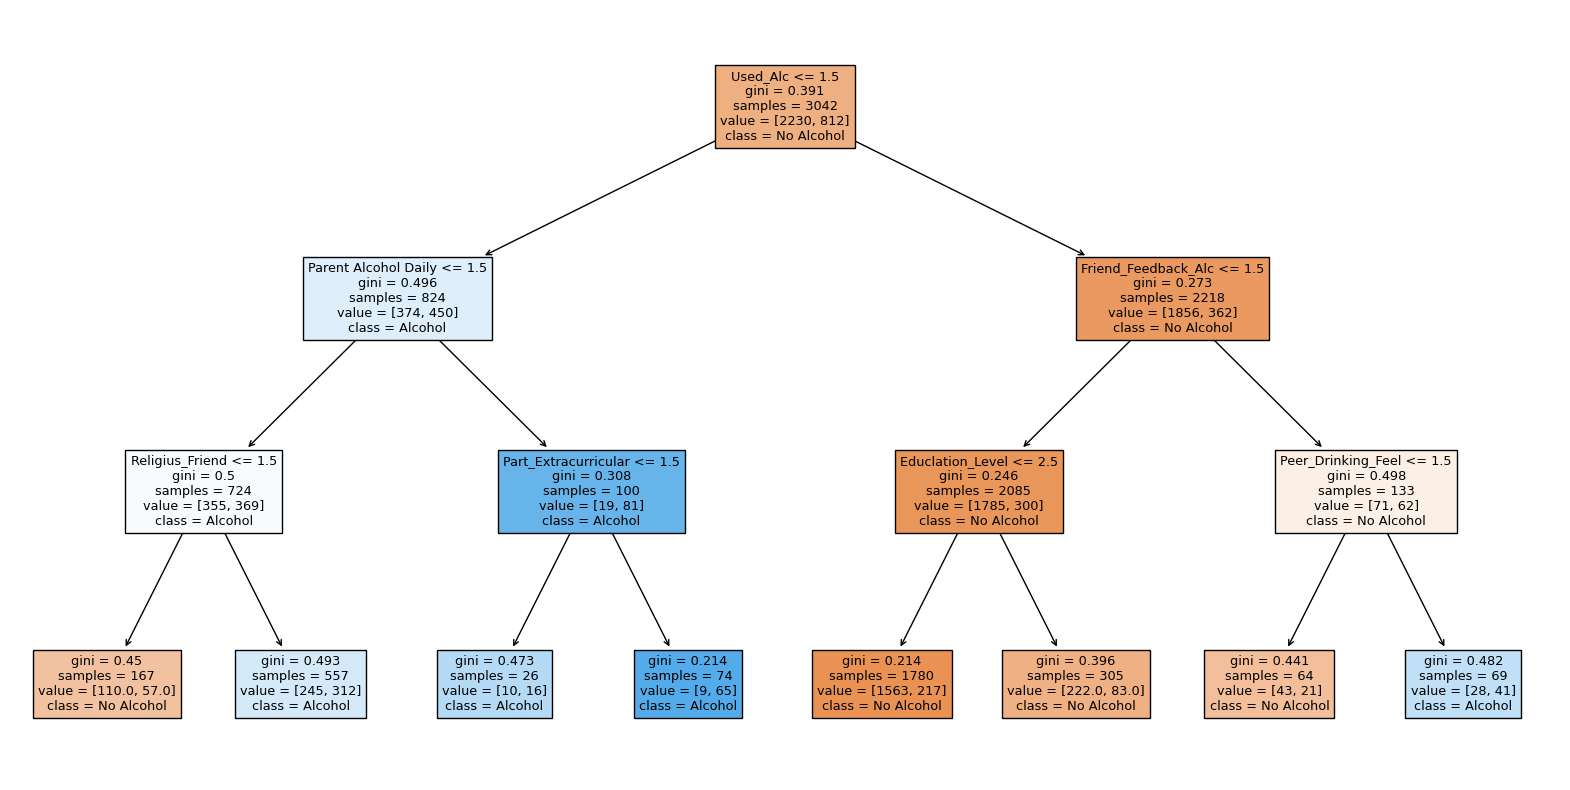

In [30]:
clf_prun_DT = DecisionTreeClassifier(max_depth=3)
clf_prun_DT.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(clf_prun_DT, filled=True, feature_names=X.columns, class_names=['No Alcohol', 'Alcohol'])
plt.show()

In [31]:
var_importance = clf_prun_DT.feature_importances_
var_importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': var_importance})
var_importance_df = var_importance_df.sort_values(by='Importance', ascending=False)
print(var_importance_df)

                           Variable  Importance
3                          Used_Alc    0.706350
21              Friend_Feedback_Alc    0.104129
19             Parent Alcohol Daily    0.063550
35                  Religius_Friend    0.049333
40                 Educlation_Level    0.047117
20               Peer_Drinking_Feel    0.018850
24             Part_Extracurricular    0.010671
36                           Gender    0.000000
29                   Part_Youth_Act    0.000000
30  Yth_seen_alc+drug_prevention_ad    0.000000
31            Education_On_alc+drug    0.000000
32           Number_Religion_Attend    0.000000
33         Yth_Believe_Religion Imp    0.000000
34               Religion_Influence    0.000000
37                             Race    0.000000
27          Part_Help_Substance_Use    0.000000
38                 Health_Condition    0.000000
39                 Attending_School    0.000000
41                   School_Skipped    0.000000
42                Individual_Mother    0

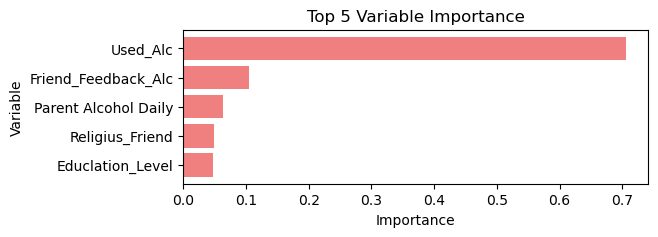

In [32]:
var_importance_5 = var_importance_df.head(5)
plt.figure(figsize=(6, 2))
plt.barh(var_importance_5['Variable'], var_importance_5['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Top 5 Variable Importance')
plt.gca().invert_yaxis()
plt.show()

##### Now let's move to Bagging method

In [33]:
base_classifier = RandomForestClassifier()
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=45, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bag = bagging_classifier.predict(X_test)

In [34]:
Accu_bag = accuracy_score(y_test, y_pred_bag)
print('Bagging Accuracy', Accu_bag)

conf_matrix_bag = confusion_matrix(y_test, y_pred_bag)
print('Confusion Matrix with Bagging')
print(conf_matrix_bag)

class_rep_bag = classification_report(y_test, y_pred_bag)
print('Classification Report with Bagging')
print(class_rep_bag)

Bagging Accuracy 0.7777777777777778
Confusion Matrix with Bagging
[[875  66]
 [224 140]]
Classification Report with Bagging
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       941
           1       0.68      0.38      0.49       364

    accuracy                           0.78      1305
   macro avg       0.74      0.66      0.67      1305
weighted avg       0.76      0.78      0.76      1305



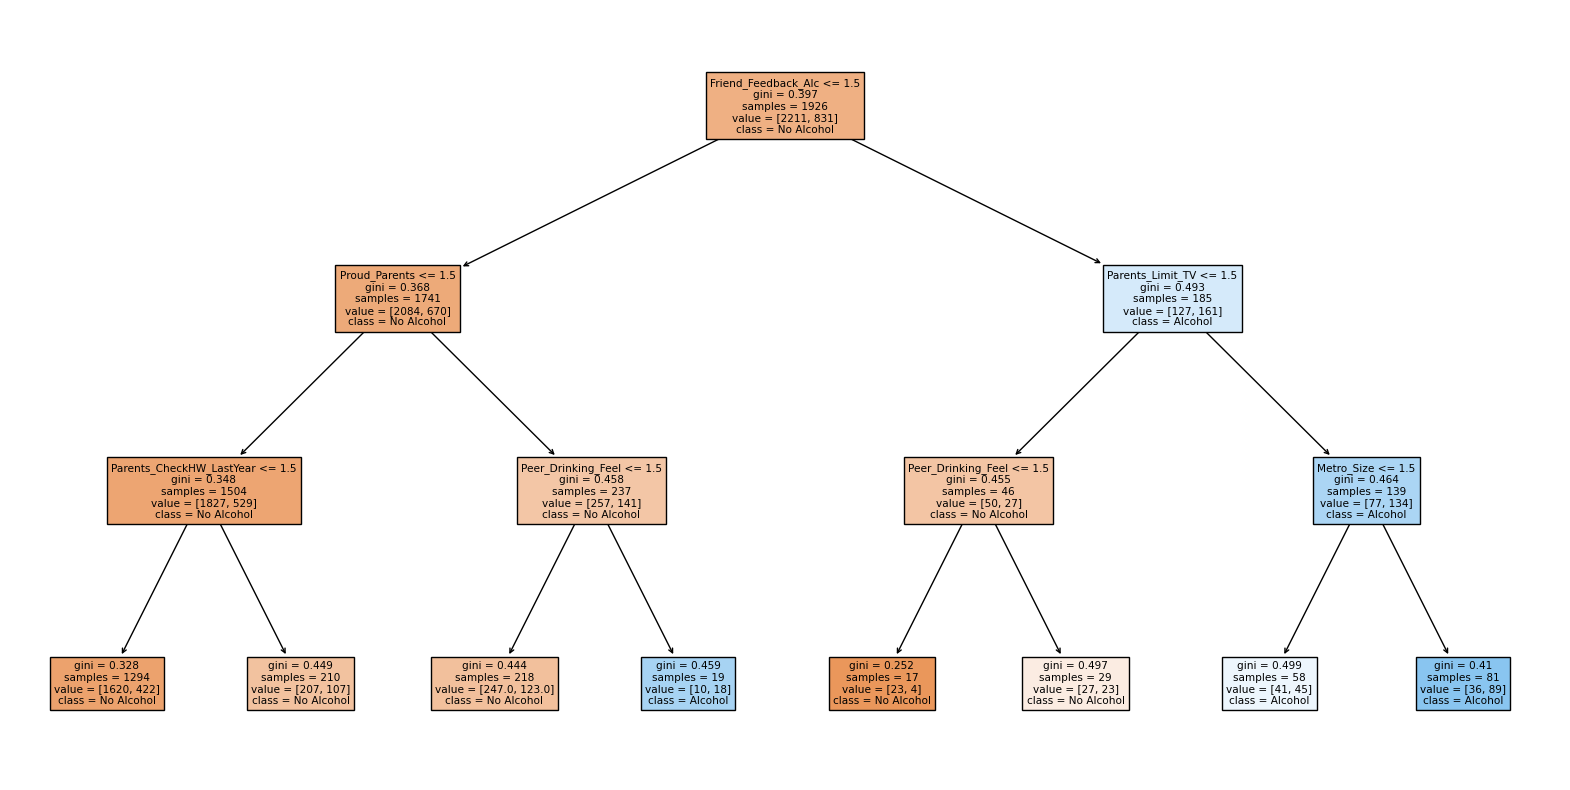

In [35]:
bag_tree = RandomForestClassifier(max_depth=3)
bag_tree.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(bag_tree.estimators_[0], filled=True, feature_names=X.columns, class_names=['No Alcohol', 'Alcohol'])
plt.show()


In [36]:
var_imp_bag = np.mean([tree.feature_importances_ for tree in bagging_classifier.estimators_], axis=0)
var_imp_df_bag = pd.DataFrame({'Variable': X.columns, 'Importance': var_imp_bag})
var_imp_df_bag = var_imp_df_bag.sort_values(by='Importance', ascending=False)
print('Variable Importance with Bagging Classifier:')
print(var_imp_df_bag)

Variable Importance with Bagging Classifier:
                           Variable  Importance
3                          Used_Alc    0.094783
40                 Educlation_Level    0.066034
38                 Health_Condition    0.040422
37                             Race    0.036972
44                           Income    0.031143
48                       Metro_Size    0.030321
41                   School_Skipped    0.028743
8                  Parents_Limit_TV    0.027241
47               Population Density    0.025575
20               Peer_Drinking_Feel    0.024067
21              Friend_Feedback_Alc    0.023378
36                           Gender    0.022840
12                 Argument_Parents    0.022572
23              Talked_with_Parents    0.021949
0                     Exp_of_School    0.021533
33         Yth_Believe_Religion Imp    0.021413
9              Parents_Limit_Snacks    0.021054
34               Religion_Influence    0.020762
46                    Poverty_Level    0.02

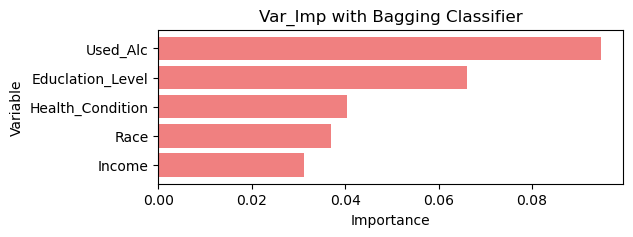

In [37]:
var_bag_imp = var_imp_df_bag.head(5)
plt.figure(figsize=(6, 2))
plt.barh(var_bag_imp['Variable'], var_bag_imp['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Var_Imp with Bagging Classifier')
plt.gca().invert_yaxis()
plt.show()


##### Now Let's check the accuracy and other parameters as per Random Forest Classifier

In [38]:
rf_classifier = RandomForestClassifier(n_estimators=45, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print('RF Accuracy', rf_accuracy)

rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('RF Confusion Matrix:')
print(rf_conf_matrix)

rf_class_rep = classification_report(y_test, y_pred_rf)
print('RF Classification Report:')
print(rf_class_rep)

RF Accuracy 0.7701149425287356
RF Confusion Matrix:
[[850  91]
 [209 155]]
RF Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       941
           1       0.63      0.43      0.51       364

    accuracy                           0.77      1305
   macro avg       0.72      0.66      0.68      1305
weighted avg       0.75      0.77      0.75      1305



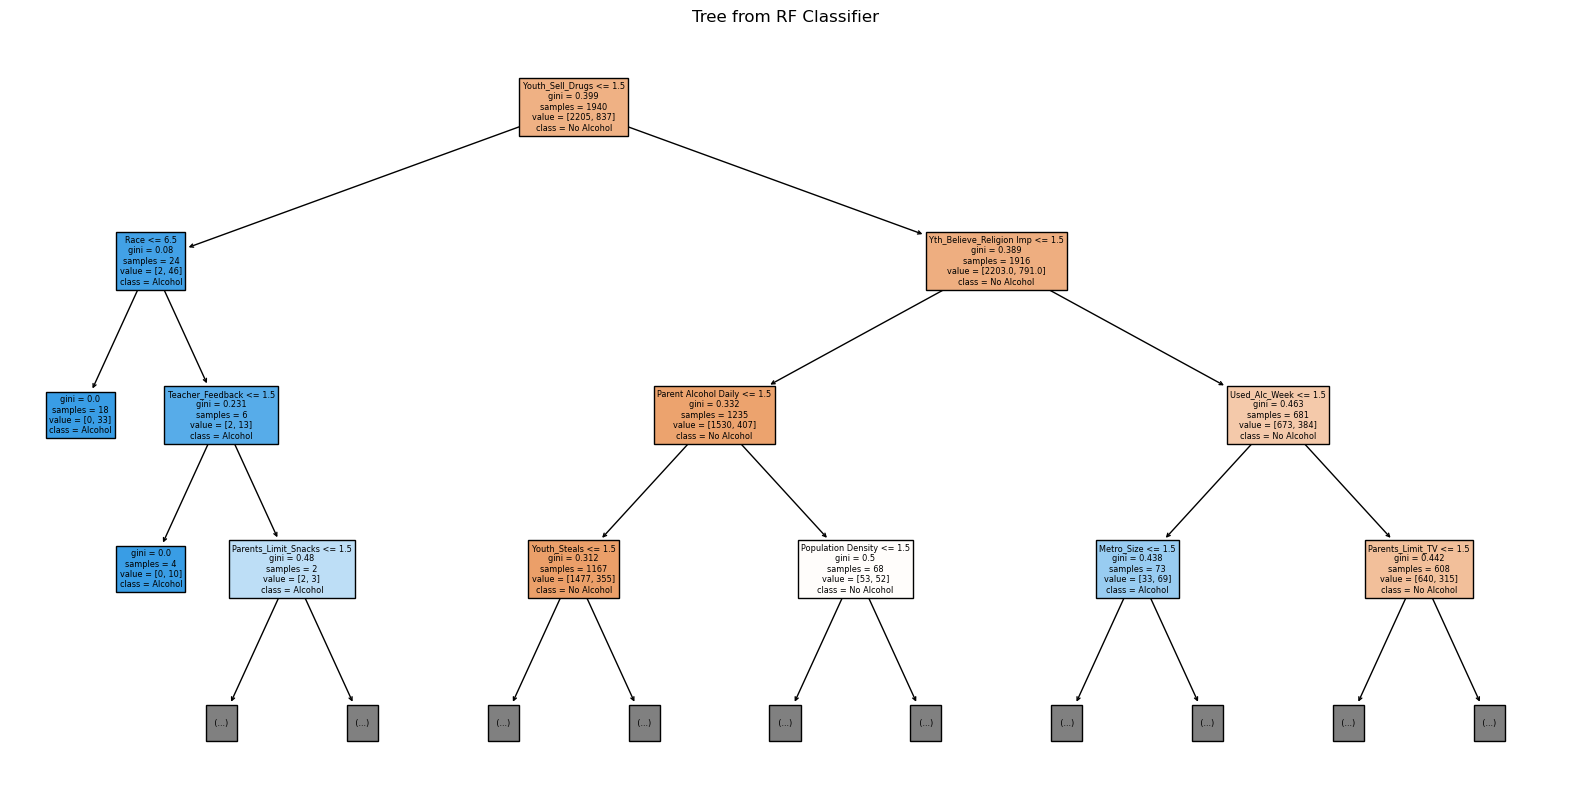

In [39]:
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=X.columns, class_names=['No Alcohol', 'Alcohol'], max_depth=3)
plt.title('Tree from RF Classifier')
plt.show()

In [40]:
rf_var_imp = rf_classifier.feature_importances_
rf_var_imp_df = pd.DataFrame({'Variable': X.columns, 'Importance': rf_var_imp})
rf_var_imp_df = rf_var_imp_df.sort_values(by='Importance', ascending=False)
print(rf_var_imp_df)

                           Variable  Importance
3                          Used_Alc    0.093898
40                 Educlation_Level    0.065793
38                 Health_Condition    0.040793
37                             Race    0.036524
44                           Income    0.031967
48                       Metro_Size    0.029524
41                   School_Skipped    0.028057
8                  Parents_Limit_TV    0.025899
47               Population Density    0.025085
23              Talked_with_Parents    0.024211
12                 Argument_Parents    0.023488
36                           Gender    0.023311
21              Friend_Feedback_Alc    0.022800
20               Peer_Drinking_Feel    0.022747
46                    Poverty_Level    0.022186
9              Parents_Limit_Snacks    0.021992
0                     Exp_of_School    0.021824
6           Parents_HelpHW_LastYear    0.021510
33         Yth_Believe_Religion Imp    0.021142
24             Part_Extracurricular    0

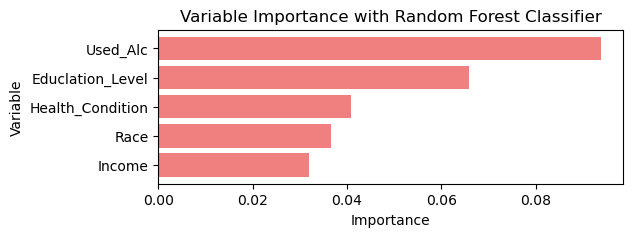

In [41]:
var_rf_imp = rf_var_imp_df.head(5)
plt.figure(figsize=(6, 2))
plt.barh(var_rf_imp['Variable'], var_rf_imp['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance with Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()


##### Now we will use the Boosting Teechnique for check the values and importance

In [42]:
boost_classifier = GradientBoostingClassifier(n_estimators=45, random_state=42)
boost_classifier.fit(X_train, y_train)
y_pred_gbm = boost_classifier.predict(X_test)

In [43]:
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print('Gradient Boosting Accuracy', accuracy_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print('GradientBoosting Confusion Matrix')
print(conf_matrix_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
print('GradientBoosting Classification Report')
print(class_report_gbm)

Gradient Boosting Accuracy 0.7762452107279694
GradientBoosting Confusion Matrix
[[867  74]
 [218 146]]
GradientBoosting Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       941
           1       0.66      0.40      0.50       364

    accuracy                           0.78      1305
   macro avg       0.73      0.66      0.68      1305
weighted avg       0.76      0.78      0.76      1305



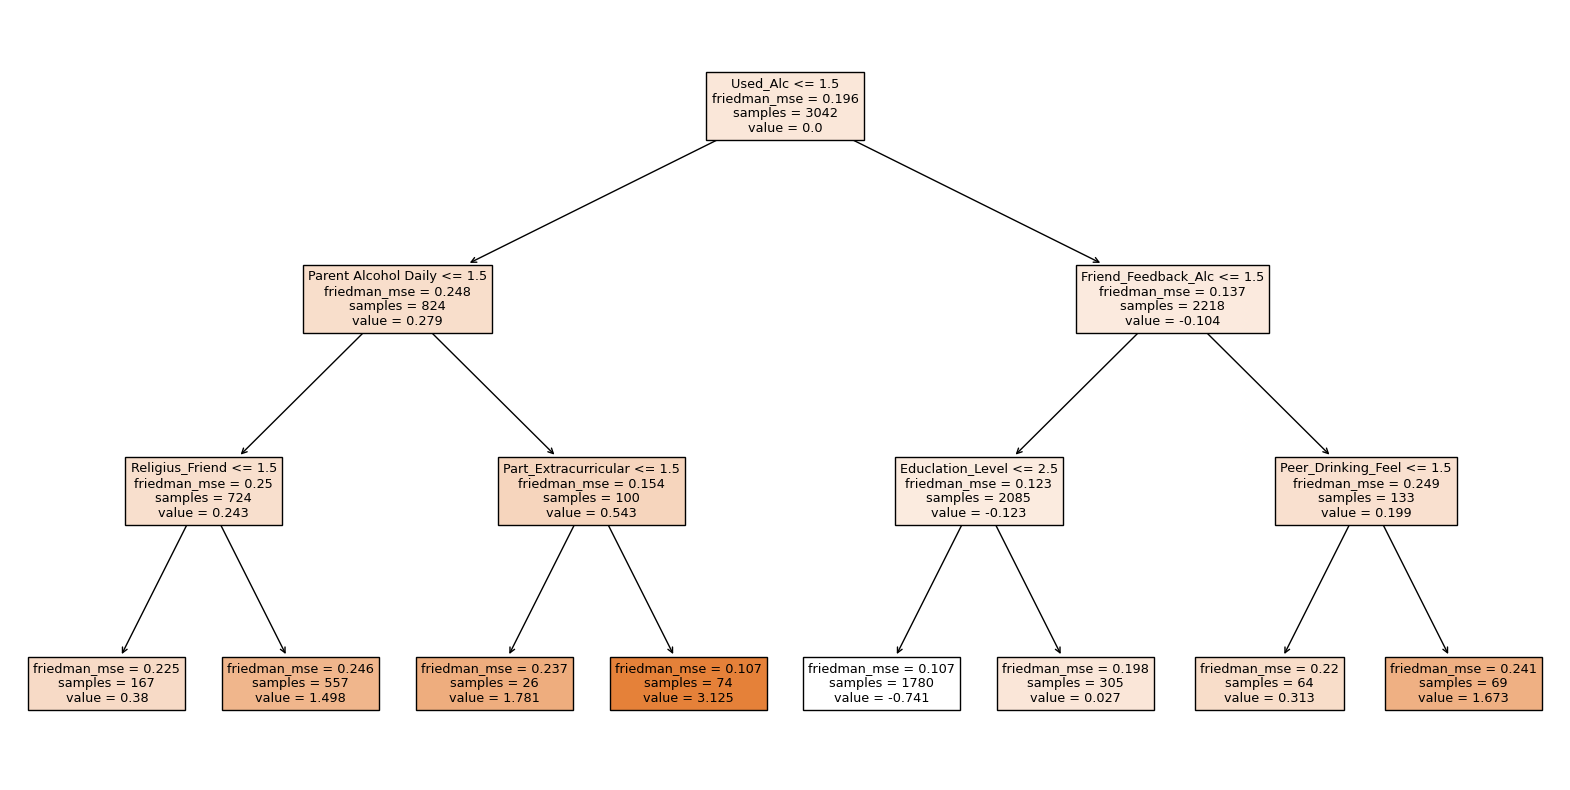

In [44]:
gbm_tree = boost_classifier.estimators_[0, 0]
plt.figure(figsize=(20, 10))
plot_tree(gbm_tree, filled=True, feature_names=X.columns, class_names=['No Alcohol', 'Alcohol'])
plt.show()

In [45]:
var_imp_boost = boost_classifier.feature_importances_
var_imp_boost_df = pd.DataFrame({'Variable': X.columns, 'Importance': var_imp_boost})
var_imp_boost_df = var_imp_boost_df.sort_values(by='Importance', ascending=False)
print(var_imp_boost_df)

                           Variable  Importance
3                          Used_Alc    0.417043
40                 Educlation_Level    0.090874
20               Peer_Drinking_Feel    0.048104
21              Friend_Feedback_Alc    0.045820
8                  Parents_Limit_TV    0.039609
16                 Youth_Sell_Drugs    0.038274
17                     Youth_Steals    0.035434
19             Parent Alcohol Daily    0.031444
12                 Argument_Parents    0.026999
35                  Religius_Friend    0.025195
41                   School_Skipped    0.023368
6           Parents_HelpHW_LastYear    0.019723
24             Part_Extracurricular    0.018231
33         Yth_Believe_Religion Imp    0.015380
34               Religion_Influence    0.013705
46                    Poverty_Level    0.013686
13                      Youth_Fight    0.013627
37                             Race    0.011725
44                           Income    0.009493
38                 Health_Condition    0

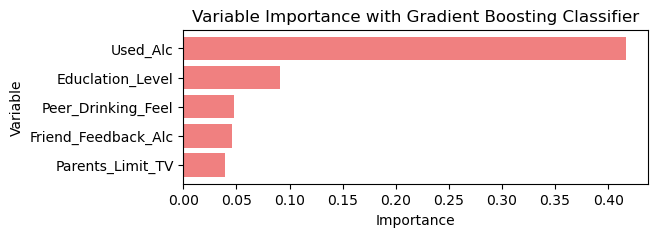

In [46]:
var_boost_imp = var_imp_boost_df.sort_values(by='Importance', ascending=False).head(5)
plt.figure(figsize=(6, 2))
plt.barh(var_boost_imp['Variable'], var_boost_imp['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance with Gradient Boosting Classifier')
plt.gca().invert_yaxis() 
plt.show()



##### Now since we have 4 different models for our Binary Classification i.e., Decision Tree Classifier with an accuracy score of 69.11%, Bagging Classifier(RF with Bagging) with an accuracy score of 77.77%, Random Forest Classifier with an accuracy of 77.01% and Gradiant boosting with an accuarcy score of 77.62%. Out of  these 4 RF with Bagging Classifier has performed the best with the highest accuracy.

### Multi-Class classification

##### We will now move forward for multi-class classification and we will consider the target varaiable as "Alc_Last_Month" and will create a new dataset for this purpose.

In [47]:
col_not_required = ['Alc_Frq_Year', 'Alc_Frq_Month', 'Alc_Last_Year', 'Alc_use_Age', 'Alc_Use']
multi_df = df.drop(columns=col_not_required)
print(multi_df.head())

   Alc_Last_Month  Exp_of_School  Teacher_Feedback  Last_Avg_Grade  Used_Alc  \
0               5              1               1.0             2.0       2.0   
1               5              1               1.0             2.0       2.0   
2               5              1               1.0             2.0       2.0   
3               5              1               1.0             2.0       2.0   
5               5              1               1.0             2.0       2.0   

   Used_Alc_Week  Parents_CheckHW_LastYear  Parents_HelpHW_LastYear  \
0            2.0                       1.0                      1.0   
1            2.0                       1.0                      2.0   
2            2.0                       1.0                      1.0   
3            2.0                       1.0                      1.0   
5            2.0                       1.0                      2.0   

   Youth_doing_HChores  Parents_Limit_TV  ...  Attending_School  \
0                  2.0   

In [48]:
X = multi_df.drop('Alc_Last_Month', axis=1)
y = multi_df['Alc_Last_Month']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_m, y_train_m)
y_pred_dt = dt_classifier.predict(X_test_m)

In [50]:
accuracy_dt = accuracy_score(y_test_m, y_pred_dt)
print('DT Accuracy', accuracy_dt)
conf_matrix_dt = confusion_matrix(y_test_m, y_pred_dt)
print(' DT Confusion Matrix ')
print(conf_matrix_dt)
class_report_dt = classification_report(y_test_m, y_pred_dt)
print('DT Classification Report')
print(class_report_dt)

DT Accuracy 0.8168582375478928
 DT Confusion Matrix 
[[  12    9    4    0   67]
 [   3    6    2    0   16]
 [   3    1    1    0   11]
 [   0    0    0    0    0]
 [  79   30   12    2 1047]]
DT Classification Report
              precision    recall  f1-score   support

           1       0.12      0.13      0.13        92
           2       0.13      0.22      0.16        27
           3       0.05      0.06      0.06        16
           4       0.00      0.00      0.00         0
           5       0.92      0.89      0.91      1170

    accuracy                           0.82      1305
   macro avg       0.24      0.26      0.25      1305
weighted avg       0.83      0.82      0.83      1305



In [51]:
dt_classifier_p = DecisionTreeClassifier(max_depth=3)
dt_classifier_p.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

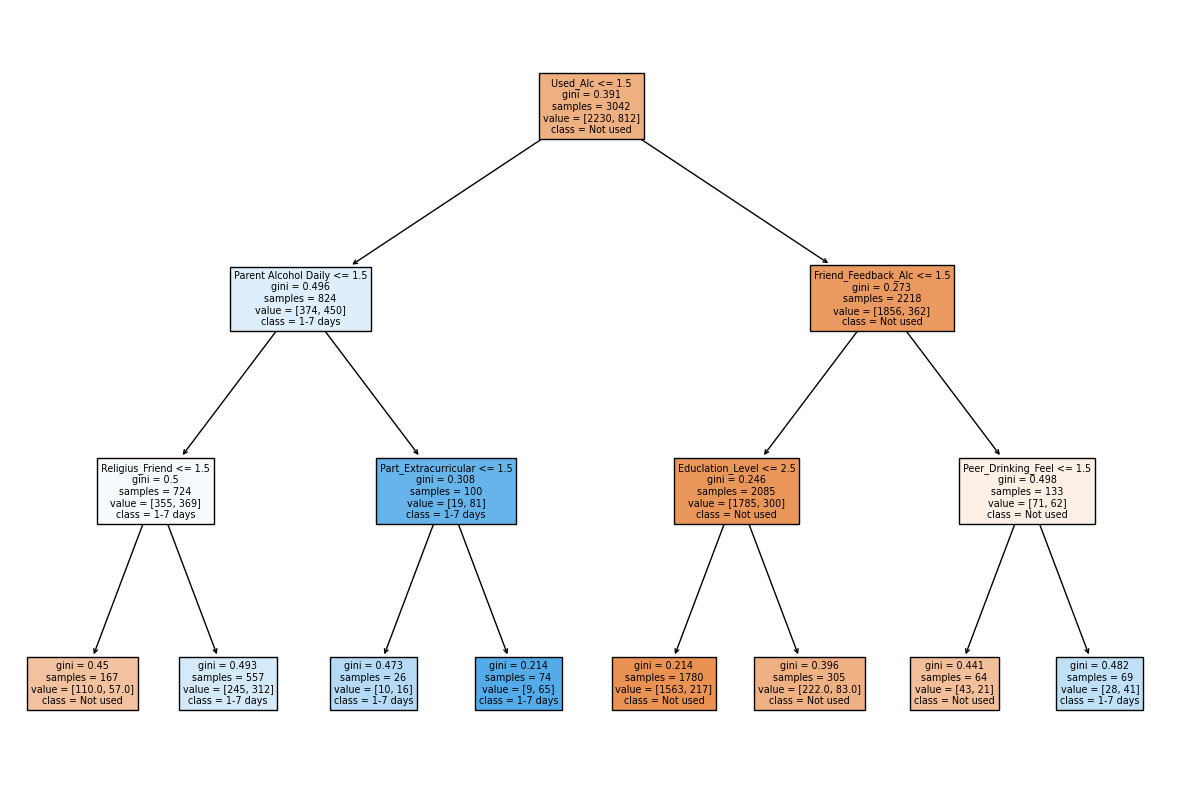

In [52]:
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier_p, filled=True, feature_names=X.columns, class_names=['Not used', '1-7 days', '8-14 days', '15-21 days', '22+ days'])
plt.show()

In [53]:
var_importance_dt = dt_classifier.feature_importances_
var_importance_dt_df = pd.DataFrame({'Variable': X.columns, 'Importance': var_importance_dt})
var_importance_dt_df = var_importance_dt_df.sort_values(by='Importance', ascending=False)
print(var_importance_dt_df)


                           Variable  Importance
37                             Race    0.067318
3                          Used_Alc    0.060141
40                 Educlation_Level    0.043972
47               Population Density    0.042622
41                   School_Skipped    0.038933
30  Yth_seen_alc+drug_prevention_ad    0.038794
38                 Health_Condition    0.036816
0                     Exp_of_School    0.035884
8                  Parents_Limit_TV    0.035841
48                       Metro_Size    0.030596
31            Education_On_alc+drug    0.029544
34               Religion_Influence    0.025627
1                  Teacher_Feedback    0.024389
44                           Income    0.024372
23              Talked_with_Parents    0.022962
12                 Argument_Parents    0.022510
5          Parents_CheckHW_LastYear    0.022482
33         Yth_Believe_Religion Imp    0.020855
9              Parents_Limit_Snacks    0.020049
32           Number_Religion_Attend    0

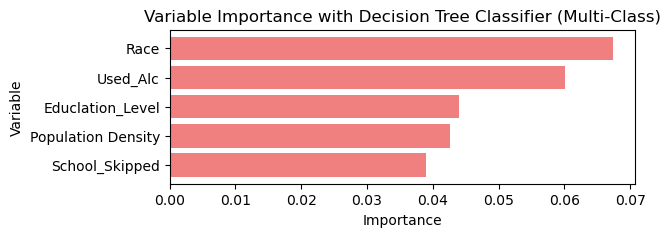

In [54]:
var_dt = var_importance_dt_df.head(5)
plt.figure(figsize=(6, 2))
plt.barh(var_dt['Variable'], var_dt['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance with Decision Tree Classifier (Multi-Class)')
plt.gca().invert_yaxis()
plt.show()


##### Now we will start with Random Forest with Bagging model

In [55]:
base_rf_class = RandomForestClassifier(n_estimators=45, random_state=42)
bag_rf_class = BaggingClassifier(base_rf_class, n_estimators=45, random_state=42)
bag_rf_class.fit(X_train_m, y_train_m)
y_pred_rfbag = bag_rf_class.predict(X_test_m)

In [56]:
acc_bag_rf = accuracy_score(y_test_m, y_pred_rfbag)
print('Random Forest with Bagging Accuracy', acc_bag_rf)

conf_matrix_rfbag = confusion_matrix(y_test_m, y_pred_rfbag)
print('Random Forest with Bagging Confusion Matrix ')
print(conf_matrix_rfbag)

class_rep_rfbag = classification_report(y_test_m, y_pred_rfbag)
print('Random Forest with Bagging Classification Report ')
print(class_rep_rfbag)

Random Forest with Bagging Accuracy 0.896551724137931
Random Forest with Bagging Confusion Matrix 
[[   0    0    0   92]
 [   0    0    0   27]
 [   0    0    0   16]
 [   0    0    0 1170]]
Random Forest with Bagging Classification Report 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        92
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        16
           5       0.90      1.00      0.95      1170

    accuracy                           0.90      1305
   macro avg       0.22      0.25      0.24      1305
weighted avg       0.80      0.90      0.85      1305



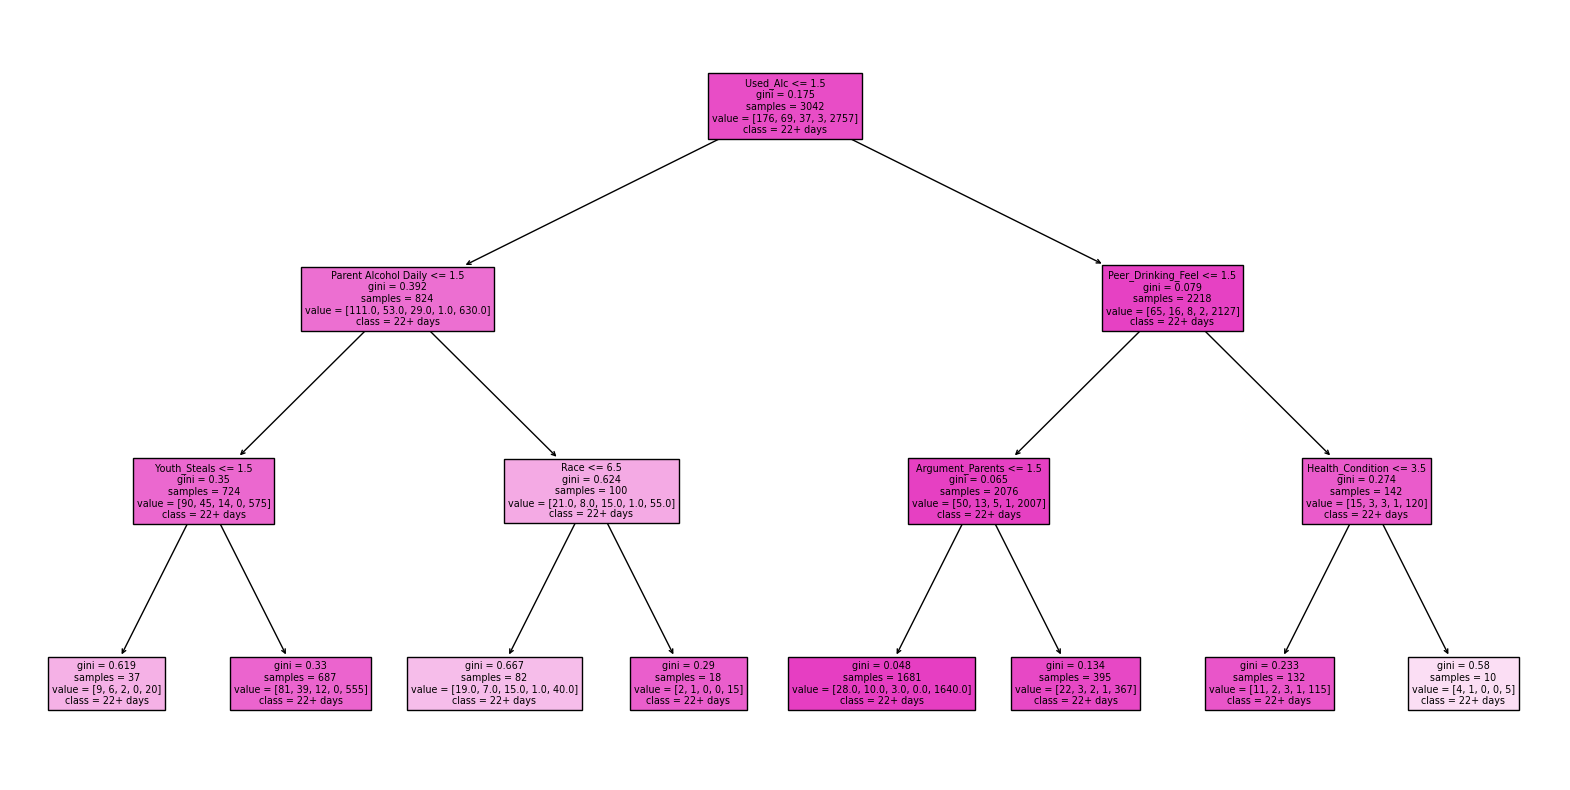

In [57]:
base_rf_tree = DecisionTreeClassifier(max_depth=3)
base_rf_tree.fit(X_train_m, y_train_m)
plt.figure(figsize=(20, 10))
plot_tree(base_rf_tree, filled=True, feature_names=X.columns, class_names=['Not used', '1-7 days', '8-14 days', '15-21 days', '22+ days'])
plt.show()


In [58]:
var_imp_rfbag = bag_rf_class.estimators_[0].feature_importances_
varimp_rfbag_df = pd.DataFrame({'Variable': X.columns, 'Importance': var_imp_rfbag})
varimp_rfbag_df = varimp_rfbag_df.sort_values(by='Importance', ascending=False)
print(varimp_rfbag_df)

                           Variable  Importance
3                          Used_Alc    0.047137
40                 Educlation_Level    0.047031
38                 Health_Condition    0.044457
48                       Metro_Size    0.037454
47               Population Density    0.033144
37                             Race    0.033098
41                   School_Skipped    0.030376
19             Parent Alcohol Daily    0.028625
44                           Income    0.028052
21              Friend_Feedback_Alc    0.027873
36                           Gender    0.026627
1                  Teacher_Feedback    0.026225
12                 Argument_Parents    0.025308
4                     Used_Alc_Week    0.025055
23              Talked_with_Parents    0.024454
31            Education_On_alc+drug    0.023229
33         Yth_Believe_Religion Imp    0.023044
0                     Exp_of_School    0.023036
34               Religion_Influence    0.023000
9              Parents_Limit_Snacks    0

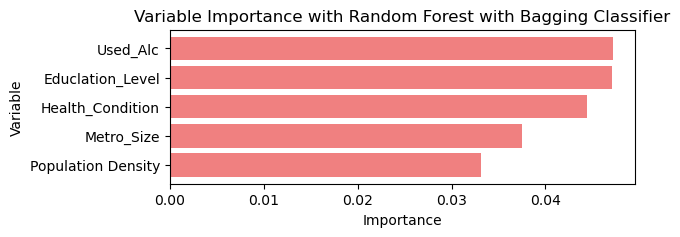

In [59]:
var_rfbag = varimp_rfbag_df.head(5)
plt.figure(figsize=(6, 2))
plt.barh(var_rfbag['Variable'], var_rfbag['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance with Random Forest with Bagging Classifier')
plt.gca().invert_yaxis()
plt.show()


#### Now we will move to Gradiant Boosting method with multi-class classifier

In [60]:
multi_boost_class = GradientBoostingClassifier(n_estimators=45, random_state=42)
multi_boost_class.fit(X_train_m, y_train_m)

y_pred_boost = multi_boost_class.predict(X_test_m)

In [61]:
multi_accu_boost = accuracy_score(y_test_m, y_pred_boost)
print('Gradient Boosting Accuracy', multi_accu_boost)

multi_confmatrix_boost = confusion_matrix(y_test_m, y_pred_boost)
print('Confusion Matrix:')
print(multi_confmatrix_boost)

multi_class_report_boost = classification_report(y_test_m, y_pred_boost)
print('Classification Report:')
print(multi_class_report_boost)

Gradient Boosting Accuracy 0.8942528735632184
Confusion Matrix:
[[   4    1    2   85]
 [   0    3    1   23]
 [   1    0    1   14]
 [   3    2    6 1159]]
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.04      0.08        92
           2       0.50      0.11      0.18        27
           3       0.10      0.06      0.08        16
           5       0.90      0.99      0.95      1170

    accuracy                           0.89      1305
   macro avg       0.50      0.30      0.32      1305
weighted avg       0.86      0.89      0.86      1305



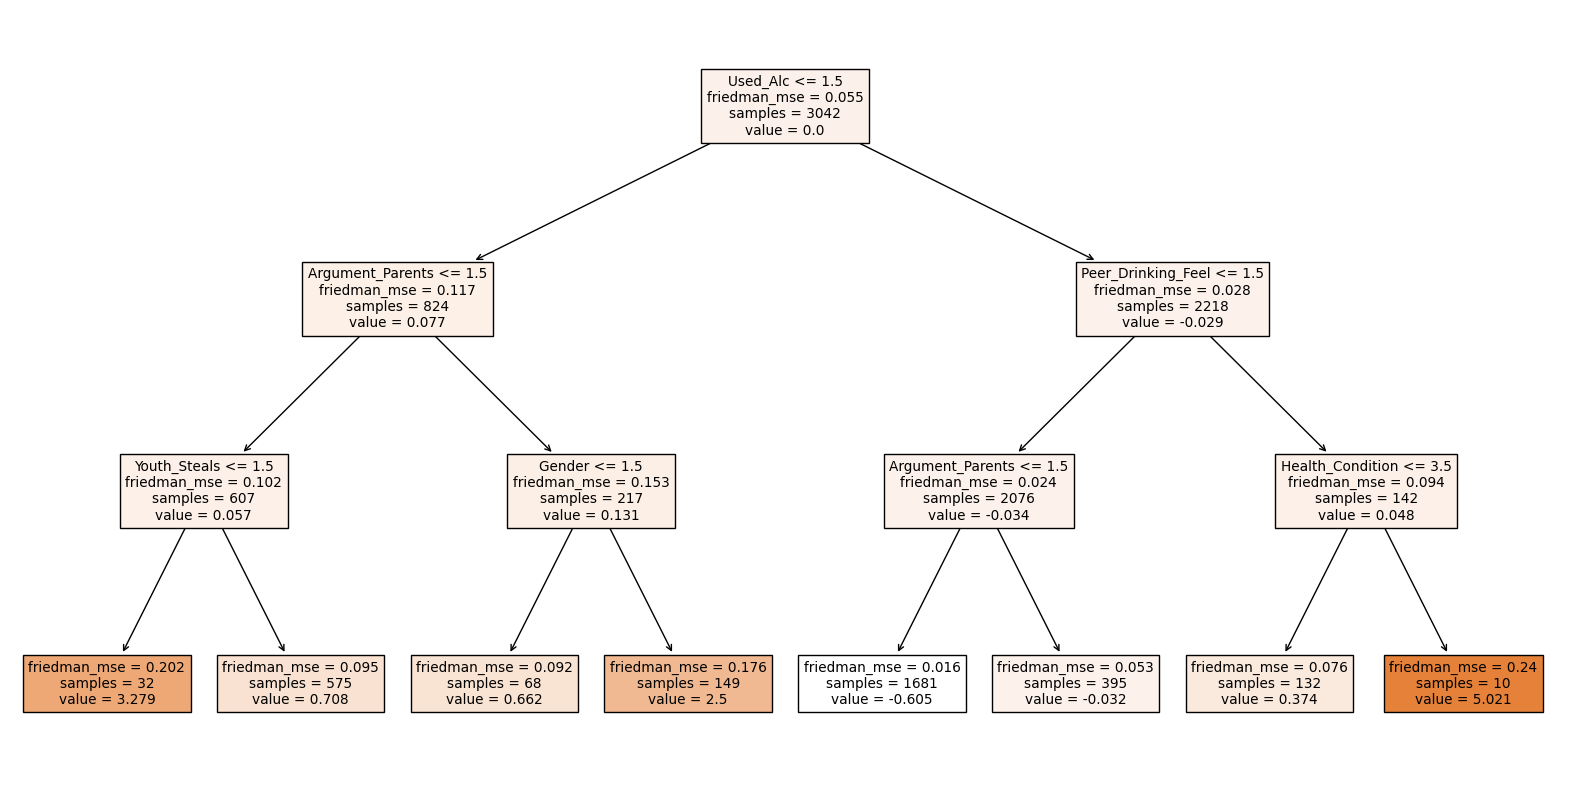

In [62]:
base_tree_boost = multi_boost_class.estimators_[0][0]
plt.figure(figsize=(20, 10))
plot_tree(base_tree_boost, filled=True, feature_names=X.columns, class_names=['Not used', '1-7 days', '8-14 days', '15-21 days', '22+ days'], max_depth=3)
plt.show()


In [63]:
var_imp_boost = multi_boost_class.feature_importances_
var_imp_boost_df = pd.DataFrame({'Variable': X.columns, 'Importance': var_imp_boost})
var_imp_boost_df = var_imp_boost_df.sort_values(by='Importance', ascending=False)
print(var_imp_boost_df)


                           Variable  Importance
3                          Used_Alc    0.235514
8                  Parents_Limit_TV    0.063552
40                 Educlation_Level    0.056827
17                     Youth_Steals    0.046015
19             Parent Alcohol Daily    0.044387
16                 Youth_Sell_Drugs    0.036685
21              Friend_Feedback_Alc    0.032253
20               Peer_Drinking_Feel    0.028987
37                             Race    0.027452
41                   School_Skipped    0.025628
12                 Argument_Parents    0.024986
38                 Health_Condition    0.024399
18                   Youth_Attacked    0.024019
24             Part_Extracurricular    0.022837
11                    Proud_Parents    0.020766
34               Religion_Influence    0.020194
46                    Poverty_Level    0.018875
44                           Income    0.018157
36                           Gender    0.016718
29                   Part_Youth_Act    0

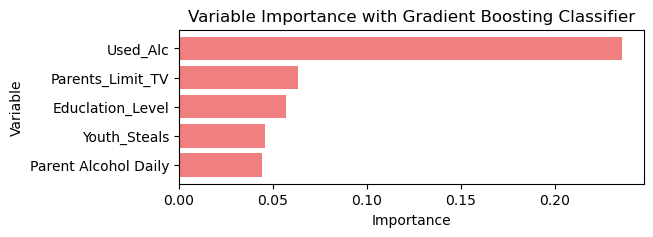

In [64]:
var_boost_m = var_imp_boost_df.head(5)
plt.figure(figsize=(6, 2))
plt.barh(var_boost_m['Variable'], var_boost_m['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance with Gradient Boosting Classifier')
plt.gca().invert_yaxis()
plt.show()


##### Now we have 3 multi-class model and in comparision we have best model of the 3 is Random Forest with Bagging with a accuracy of 92.36% followed by Gradiante Boosting with a accuarcy of 91.87% and the last in line is DT Model which has a accuarcy of 83.81%.

### Regression Model

##### We move to our final part using Regression models for prediction.

In [65]:
col_not_required = ['Alc_Frq_Year', 'Alc_Frq_Month', 'Alc_Last_Year', 'Alc_use_Age', 'Alc_Use']
reg_df = df.drop(columns=col_not_required)
print(reg_df.head())

   Alc_Last_Month  Exp_of_School  Teacher_Feedback  Last_Avg_Grade  Used_Alc  \
0               5              1               1.0             2.0       2.0   
1               5              1               1.0             2.0       2.0   
2               5              1               1.0             2.0       2.0   
3               5              1               1.0             2.0       2.0   
5               5              1               1.0             2.0       2.0   

   Used_Alc_Week  Parents_CheckHW_LastYear  Parents_HelpHW_LastYear  \
0            2.0                       1.0                      1.0   
1            2.0                       1.0                      2.0   
2            2.0                       1.0                      1.0   
3            2.0                       1.0                      1.0   
5            2.0                       1.0                      2.0   

   Youth_doing_HChores  Parents_Limit_TV  ...  Attending_School  \
0                  2.0   

In [66]:
X = reg_df.drop('Alc_Last_Month', axis=1)
y = reg_df['Alc_Last_Month']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.3, random_state=42)

##### Decision Tree Regressor

In [67]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_r, y_train_r)
y_pred_dt = dt_reg.predict(X_test_r)
mse_dt = mean_squared_error(y_test_r, y_pred_dt)
print('Decision Tree Regressor MSE ', mse_dt)


Decision Tree Regressor MSE  2.2758620689655173


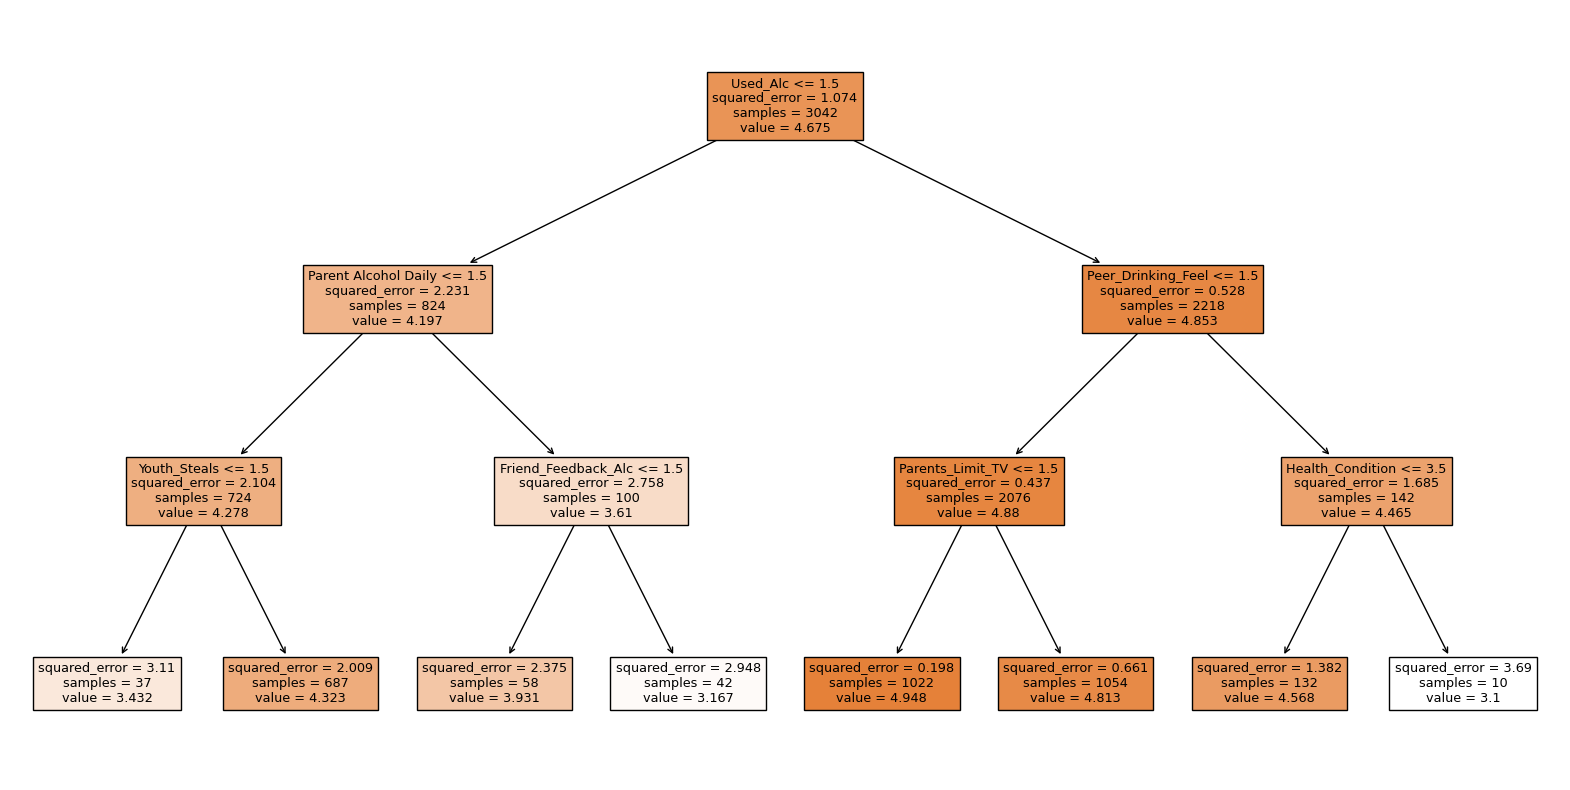

In [68]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train_r, y_train_r)
plt.figure(figsize=(20, 10))
plot_tree(tree_reg, filled=True, feature_names=X.columns)
plt.show()

In [69]:
feature_importances = tree_reg.feature_importances_
var_imp_df = pd.DataFrame({'Variable': X.columns, 'Importance': feature_importances})
var_imp_df = var_imp_df.sort_values(by='Importance', ascending=False)
print(var_imp_df)


                           Variable  Importance
3                          Used_Alc    0.659567
19             Parent Alcohol Daily    0.099780
17                     Youth_Steals    0.070968
20               Peer_Drinking_Feel    0.058260
38                 Health_Condition    0.051052
21              Friend_Feedback_Alc    0.036262
8                  Parents_Limit_TV    0.024111
36                           Gender    0.000000
30  Yth_seen_alc+drug_prevention_ad    0.000000
31            Education_On_alc+drug    0.000000
32           Number_Religion_Attend    0.000000
33         Yth_Believe_Religion Imp    0.000000
34               Religion_Influence    0.000000
35                  Religius_Friend    0.000000
0                     Exp_of_School    0.000000
37                             Race    0.000000
28         Part_Preg/STD_Prevention    0.000000
39                 Attending_School    0.000000
40                 Educlation_Level    0.000000
41                   School_Skipped    0

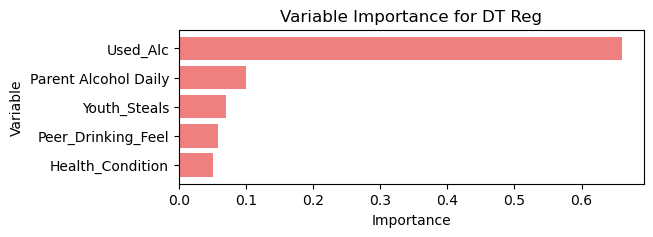

In [70]:
varimp_reg_dt = var_imp_df.head(5)
plt.figure(figsize=(6, 2))
plt.barh(varimp_reg_dt['Variable'], varimp_reg_dt['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance for DT Reg')
plt.gca().invert_yaxis()
plt.show()

##### RF Regressor with Boosting

In [71]:
base_rf_regressor = RandomForestRegressor(n_estimators=45, random_state=42)
bag_rf_regressor = BaggingRegressor(base_rf_regressor, n_estimators=45, random_state=42)
bag_rf_regressor.fit(X_train_r, y_train_r)
y_pred_rf_bag = bag_rf_regressor.predict(X_test_r)

In [72]:
mse_rf_bag = mean_squared_error(y_test_r, y_pred_rf_bag)
print('RF Regressor Bagging MSE', mse_rf_bag)

RF Regressor Bagging MSE 1.0918820689071205


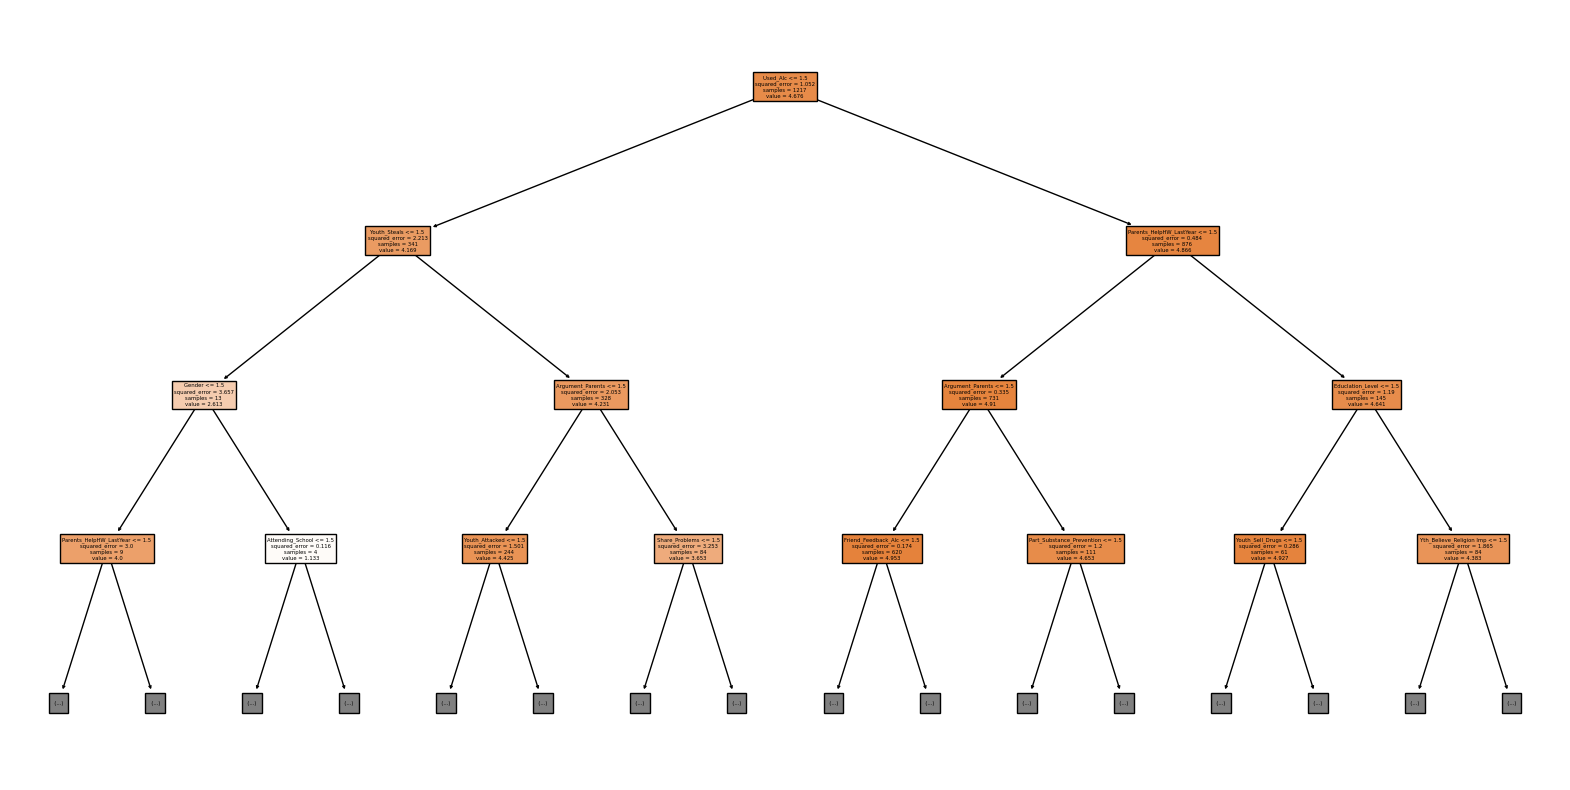

In [73]:
base_rf_tree = bag_rf_regressor.estimators_[0].estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(base_rf_tree, filled=True, feature_names=X.columns, max_depth=3)
plt.show()

In [74]:
var_imp_rfr_bag = bag_rf_regressor.estimators_[0].feature_importances_
var_imp_rfrbag_df = pd.DataFrame({'Variable': X.columns, 'Importance': var_imp_rfr_bag})
var_imp_rfrbag_df = var_imp_rfrbag_df.sort_values(by='Importance', ascending=False)
print(var_imp_rfrbag_df)

                           Variable  Importance
3                          Used_Alc    0.079008
38                 Health_Condition    0.053679
40                 Educlation_Level    0.042514
37                             Race    0.039781
48                       Metro_Size    0.032254
41                   School_Skipped    0.031658
21              Friend_Feedback_Alc    0.027853
44                           Income    0.027802
47               Population Density    0.026440
19             Parent Alcohol Daily    0.026263
9              Parents_Limit_Snacks    0.026120
33         Yth_Believe_Religion Imp    0.024734
0                     Exp_of_School    0.024194
24             Part_Extracurricular    0.023905
12                 Argument_Parents    0.023903
32           Number_Religion_Attend    0.022447
23              Talked_with_Parents    0.021598
36                           Gender    0.021586
1                  Teacher_Feedback    0.021467
34               Religion_Influence    0

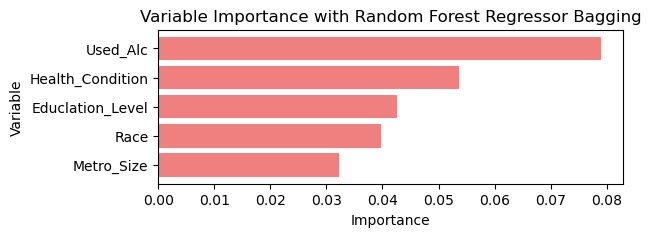

In [75]:
var_rfr_bag = var_imp_rfrbag_df.head(5)
plt.figure(figsize=(6, 2))
plt.barh(var_rfr_bag['Variable'], var_rfr_bag['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance with Random Forest Regressor Bagging')
plt.gca().invert_yaxis() 
plt.show()

#### Gradient Boosting Regressor

In [76]:
boosting_regressor = GradientBoostingRegressor(n_estimators=45, random_state=42)
boosting_regressor.fit(X_train_r, y_train_r)

GradientBoostingRegressor(n_estimators=45, random_state=42)

In [77]:
y_pred_boost = boosting_regressor.predict(X_test_r)
mse_boost = mean_squared_error(y_test_r, y_pred_boost)
print('Gradient Boosting Regressor MSE:', mse_boost)

Gradient Boosting Regressor MSE: 1.0821929942511794


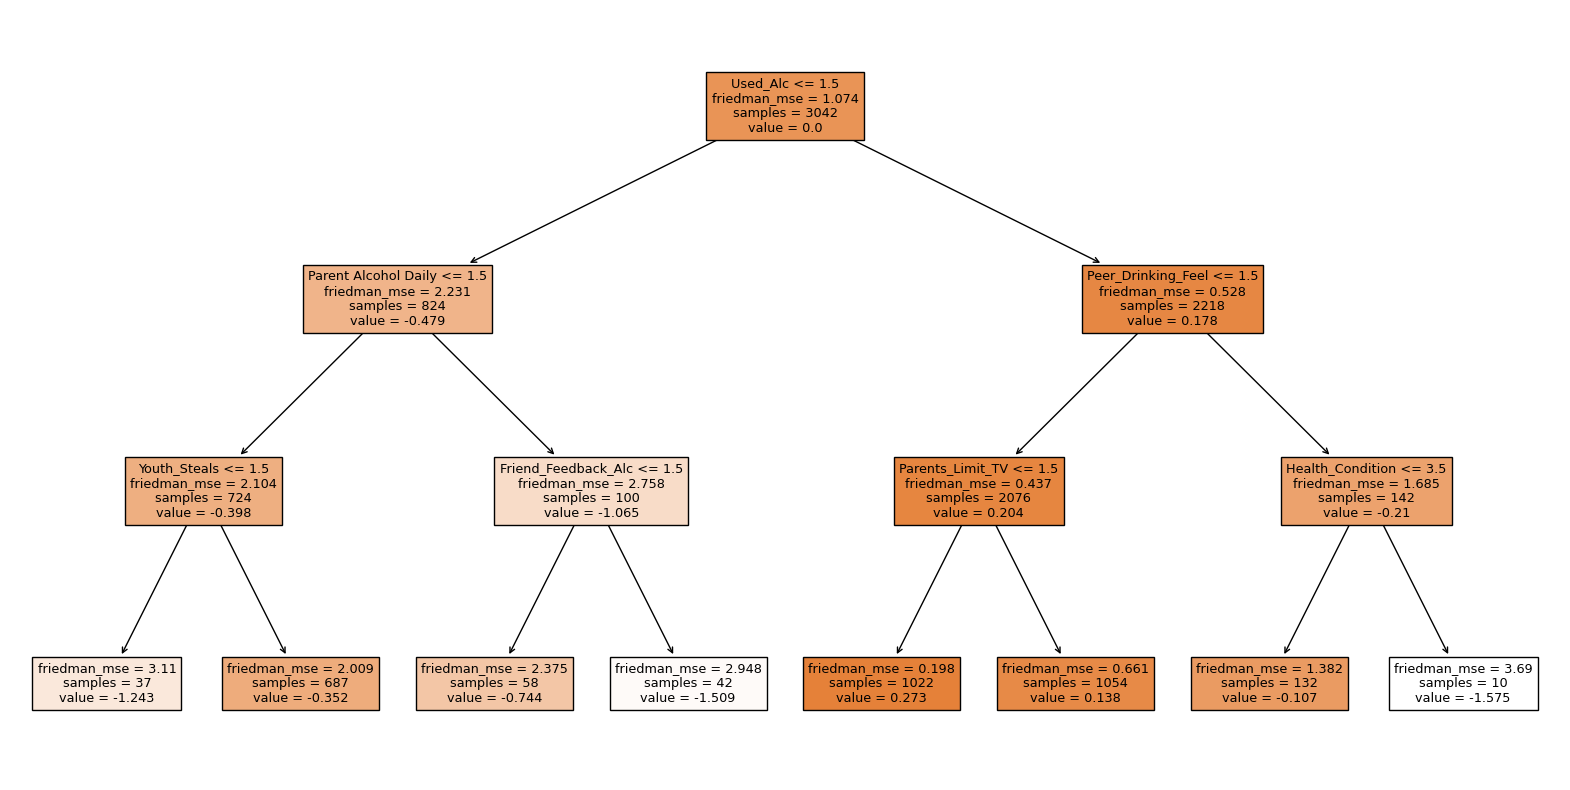

In [78]:
base_tree = boosting_regressor.estimators_[0, 0]
plt.figure(figsize=(20, 10))
plot_tree(base_tree, filled=True, feature_names=X.columns, max_depth=3)
plt.show()

In [79]:
var_imp_boost_gbr = boosting_regressor.feature_importances_
var_imp_df_gbr = pd.DataFrame({'Variable': X.columns, 'Importance': var_imp_boost_gbr})
var_imp_df_gbr = var_imp_df.sort_values(by='Importance', ascending=False)
print(var_imp_df_gbr)

                           Variable  Importance
3                          Used_Alc    0.659567
19             Parent Alcohol Daily    0.099780
17                     Youth_Steals    0.070968
20               Peer_Drinking_Feel    0.058260
38                 Health_Condition    0.051052
21              Friend_Feedback_Alc    0.036262
8                  Parents_Limit_TV    0.024111
13                      Youth_Fight    0.000000
2                    Last_Avg_Grade    0.000000
4                     Used_Alc_Week    0.000000
5          Parents_CheckHW_LastYear    0.000000
6           Parents_HelpHW_LastYear    0.000000
7               Youth_doing_HChores    0.000000
9              Parents_Limit_Snacks    0.000000
10             Parents_Appreciation    0.000000
11                    Proud_Parents    0.000000
15                   Youth_have_Gun    0.000000
26        Part_Substance_Prevention    0.000000
14                Youth_Group_Fight    0.000000
27          Part_Help_Substance_Use    0

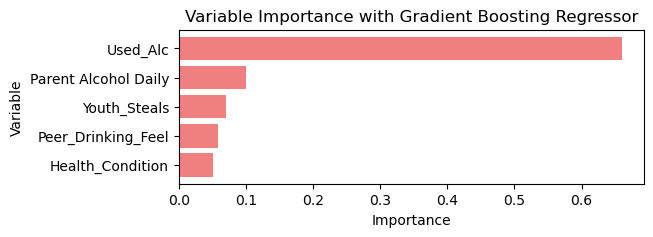

In [80]:
var_gbr = var_imp_df_gbr.head(5)
plt.figure(figsize=(6, 2))
plt.barh(var_gbr['Variable'], var_gbr['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance with Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

##### In the Regressor models we have the best model model as Gradient Boosting Regressor came up with the lowest MSE of 1.0821 in comparision with Decision Tree Regressor with MSE of 2.275862 and  Random Forest Regressor with Bagging which has a MSE of 1.09188.